**3. Aplicar diferentes operaciones morfologicas a las siguientes imagenes en escala de grises (si la imagen no esta en grises, primero convertir a escala de grises): butterfly.jpeg, quetzalgris.png, chestXray.jpeg.** 

Explicar 
- ¿Cual es el efecto de aplicar dilatacion y erosion a estas imagenes? 
- ¿Cual es el efecto de aplicar opening y closing a estas imagenes? 
- ¿Que hace el white top-hat? ¿Para que puede ser util?

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Para que las gráficas se muestren inline en el notebook
%matplotlib inline

In [7]:
# Función para cargar la imagen y convertirla a escala de grises (si no lo está)
def load_and_convert(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error al leer la imagen: {image_path}")
        return None
    # Si la imagen tiene 3 canales, se convierte a escala de grises
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    return gray

In [8]:
# Función para aplicar las operaciones morfológicas
def morphological_operations(image, kernel_size=(5,5)):
    # Crear un elemento estructurante rectangular
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15)) # ajuste para que se vea mejor. 
    
    # Erosión: reduce las regiones brillantes
    erosion = cv2.erode(image, kernel, iterations=1)
    
    # Dilatación: expande las regiones brillantes
    dilation = cv2.dilate(image, kernel, iterations=1)
    
    # Opening: erosión seguida de dilatación (elimina ruido pequeño)
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    
    # Closing: dilatación seguida de erosión (rellena pequeños huecos)
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    
    # White Top-Hat: diferencia entre la imagen original y su apertura
    white_tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel2)
    
    return erosion, dilation, opening, closing, white_tophat

In [9]:
# Lista de nombres de imágenes
image_names = ["butterfly.jpeg", "quetzalgris.png", "chestXray.jpeg"]
folder = "img"

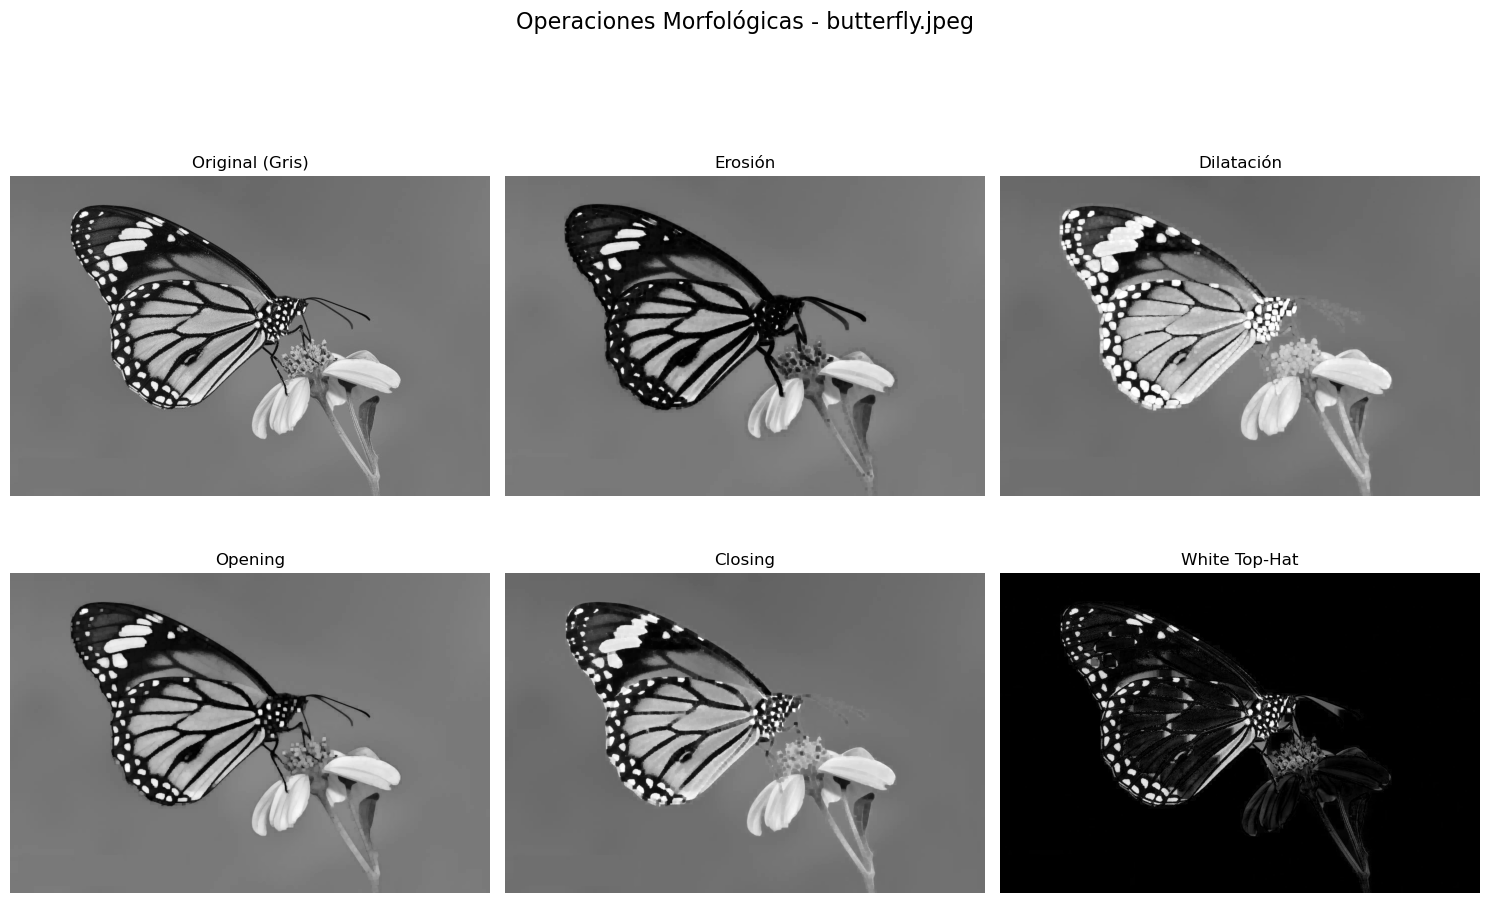

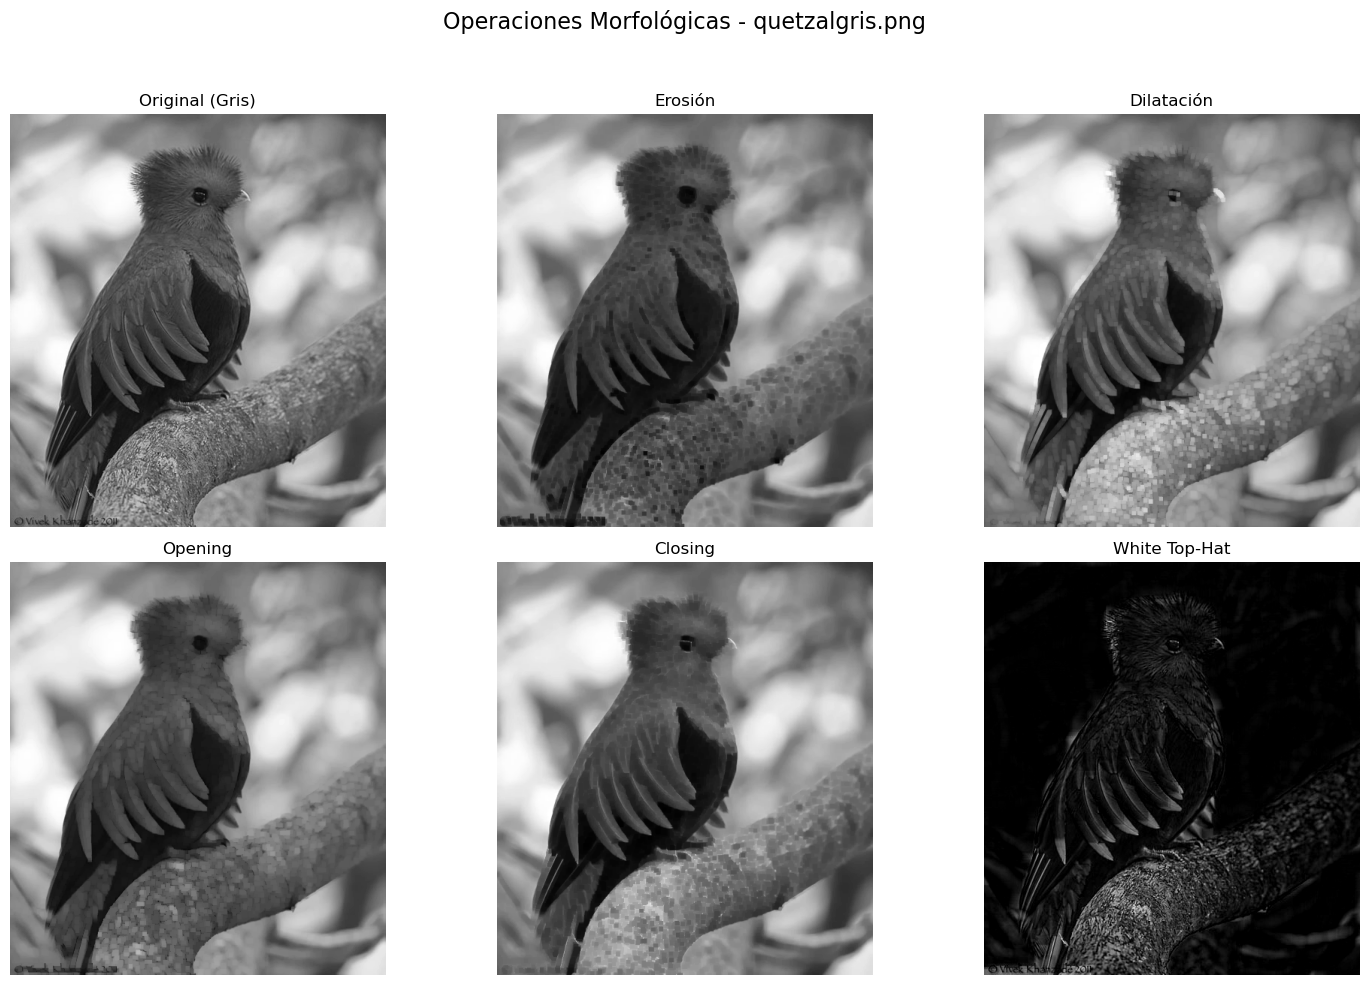

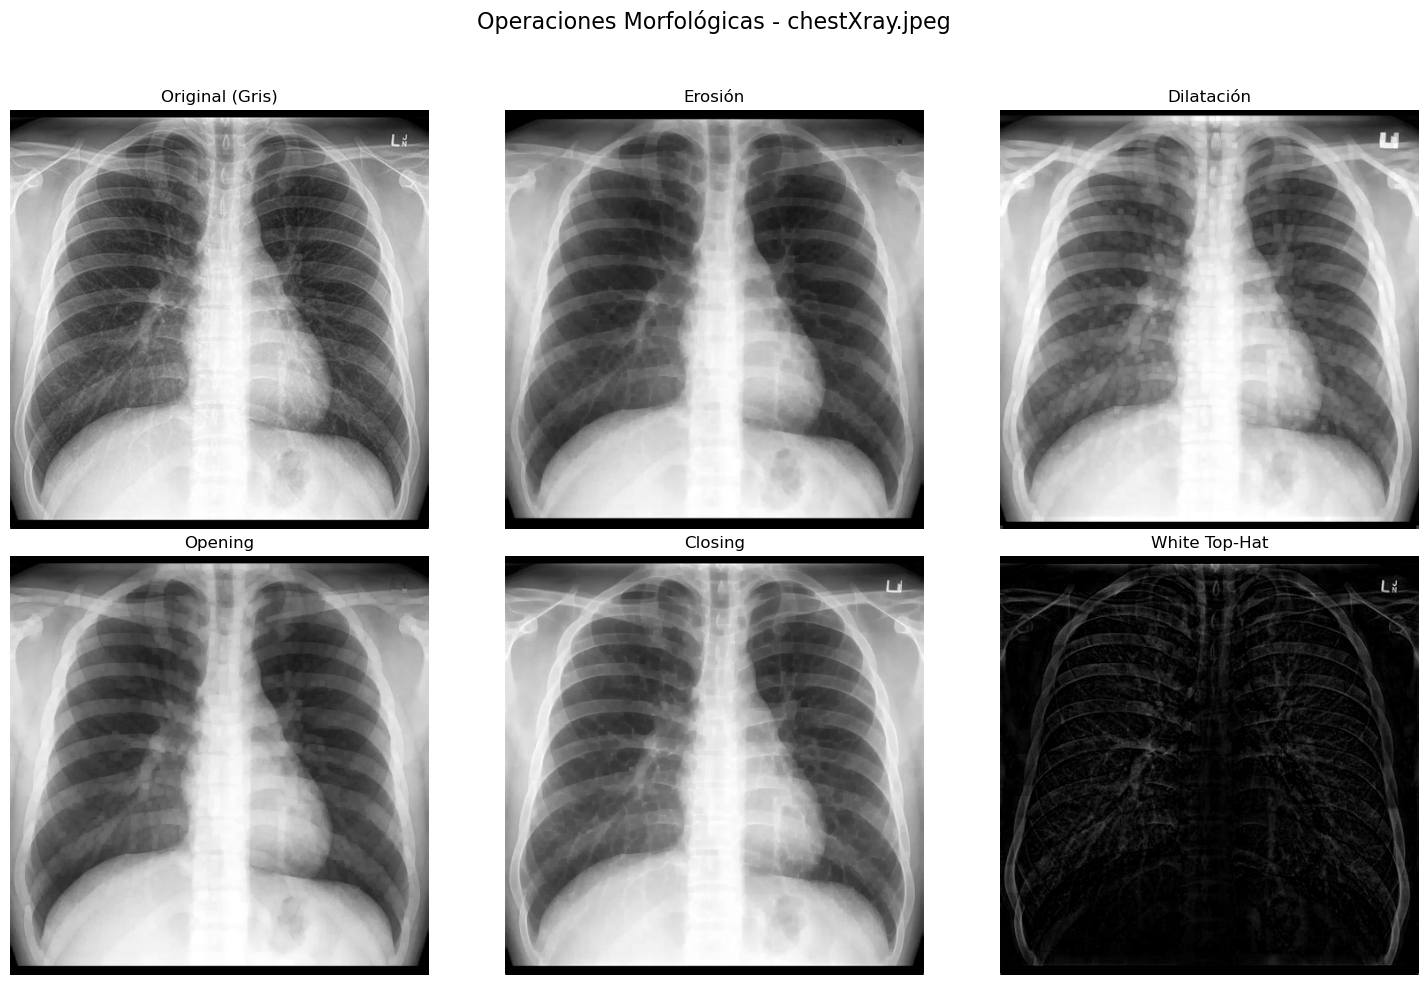

In [10]:
# Procesamos cada imagen y mostramos los resultados
for name in image_names:
    path = os.path.join(folder, name)
    gray = load_and_convert(path)
    
    if gray is None:
        continue  # Si no se pudo cargar, salta esta imagen
    
    # Aplicamos las operaciones morfológicas
    erosion, dilation, opening, closing, white_tophat = morphological_operations(gray)
    
    # Configuramos la visualización con subplots
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    
    # Mostrar la imagen original y los resultados
    axs[0, 0].imshow(gray, cmap='gray')
    axs[0, 0].set_title("Original (Gris)")
    
    axs[0, 1].imshow(erosion, cmap='gray')
    axs[0, 1].set_title("Erosión")
    
    axs[0, 2].imshow(dilation, cmap='gray')
    axs[0, 2].set_title("Dilatación")
    
    axs[1, 0].imshow(opening, cmap='gray')
    axs[1, 0].set_title("Opening")
    
    axs[1, 1].imshow(closing, cmap='gray')
    axs[1, 1].set_title("Closing")
    
    axs[1, 2].imshow(white_tophat, cmap='gray')
    axs[1, 2].set_title("White Top-Hat")
    
    # Ocultar los ejes para una mejor visualización
    for ax in axs.flat:
        ax.axis('off')
    
    plt.suptitle(f"Operaciones Morfológicas - {name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

Las operaciones morfológicas como dilatación y erosión permiten modificar la geometría de las regiones brillantes de una imagen; la dilatación expande estas regiones, conectando elementos cercanos, mientras que la erosión las contrae, eliminando pequeñas irregularidades. El opening y closing se usan para eliminar ruido (opening) o rellenar huecos (closing), suavizando los contornos y mejorando la continuidad de los objetos. El white top-hat extrae los detalles brillantes que se pierden en el proceso de apertura, lo que resulta útil para resaltar pequeñas imperfecciones o defectos en la imagen. durante unos pocos segundos

La dilatación expande las regiones brillantes y la erosión las contrae, mientras que el opening (erosión seguida de dilatación) elimina el ruido sin alterar significativamente la forma de los objetos y el closing (dilatación seguida de erosión) rellena pequeños huecos y suaviza los contornos. El white top-hat, que se obtiene restando la imagen tras el opening de la imagen original, extrae los detalles pequeños y brillantes eliminados en el proceso, siendo útil para resaltar microdefectos y características puntuales en la imagen.